In [28]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [29]:
# load the data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
# select features for clustering
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [31]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### find best k using elbow method

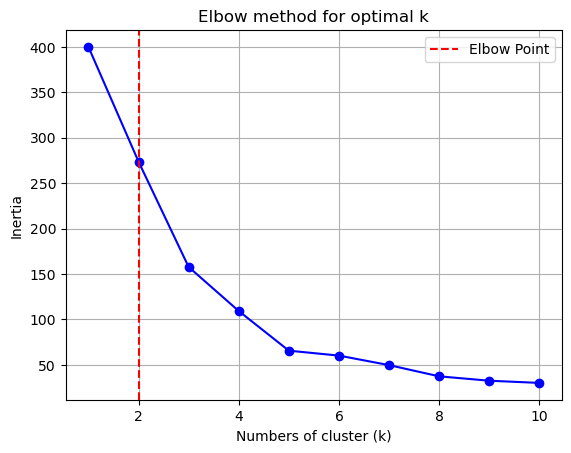

The best numbers of cluster based on Elbow Method is:  2


In [32]:
inertia = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# plot the Elbow curve
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Numbers of cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal k')
plt.grid()

# find the Elbow point
diff = [inertia[i] - inertia[i+1] for i in range(len(inertia) - 1)]
best_k = diff.index(max(diff)) + 2

# add a vertical line to indicate the elbow point
plt.axvline(x = best_k, color = 'r', linestyle = '--', label = 'Elbow Point')
plt.legend()
plt.show()

print('The best numbers of cluster based on Elbow Method is: ',best_k)

In [33]:
# apply KMeans with best k
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

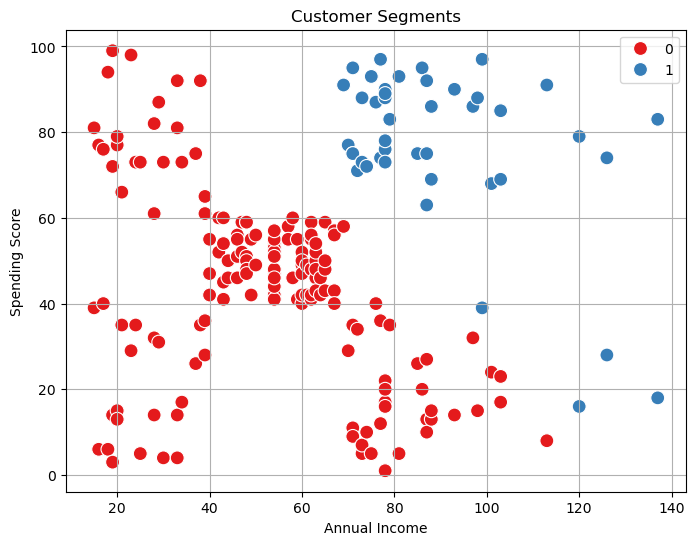

In [44]:
# Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, hue = 'Segment', palette = 'Set1', s = 100)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.legend()
plt.grid()
plt.show()